Validate stellar colors in a sample output of DM stack.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import time
import numpy as np
import h5py
from clusters import validation
from clusters import data
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

Files with 'filtered' tag contain only galaxies. Without: stars and galaxies.

In [2]:
# want only the small output hdf5 files.
filenames = [f for f in os.listdir(os.getcwd()) if (any([f.endswith('hdf5')]) and any([f.__contains__('small')]))]
print filenames

['MACSJ2243.3-0935_small.hdf5', 'MACSJ2243.3-0935_small_extinction.hdf5', 'MACSJ2243.3-0935_small_filtered_data.hdf5']


Since the output is not the full output, load_cluster function in validation.py won't work. Load the cluster manually.

In [2]:
# read data
d = data.read_hdf5('../../work/CL0016+16_all.hdf5')
print d.keys()
# read extinction law parameters
d2 = data.read_hdf5('../../work/CL0016+16_all_extinction.hdf5')
print d2.keys()

[u'deepCoadd_meas', u'wcs', u'deepCoadd_forced_src', u'forced_src']
[u'extinction']


In [3]:
ifilt= 'i_new'      # specify using the new i-band (i_old is a possibility for some outputs)
d2= d2[u'extinction']    # correct_for_extinction wont take the dictionary.

# correct magnitude for extinction
data.correct_for_extinction(d['deepCoadd_forced_src'], d2, ifilt=ifilt)
data.correct_for_extinction(d['deepCoadd_meas'], d2, ifilt=ifilt)

In [4]:
help(validation.stellarLocus)

Help on function stellarLocus in module clusters.validation:

stellarLocus(d, mag_type='modelfit_CModel_mag_extcorr', ifilt='i_new', cat='deepCoadd_forced_src')
    Test to see whether the colors are okay by plotting stellar loci and comparing with analytical fits.
    
    First a few color-color (and one mag-color) plots are plotted based on the input magnitudes. Since analytical 
    fits are based on SDSS data, the given magnitudes are then converted to SDSS mags. Fits are overplotted
    with the derived SDSS magnitudes, and then residuals are calculated and plotted. The analytical plots are plotted
    as an intermediary as well.
    
    Three plots are saved. Nothing is returned.



Saved plot:  stellarLocusPlot_modelfit_CModel_mag_extcorr_i_old_deepCoadd_forced_src.png


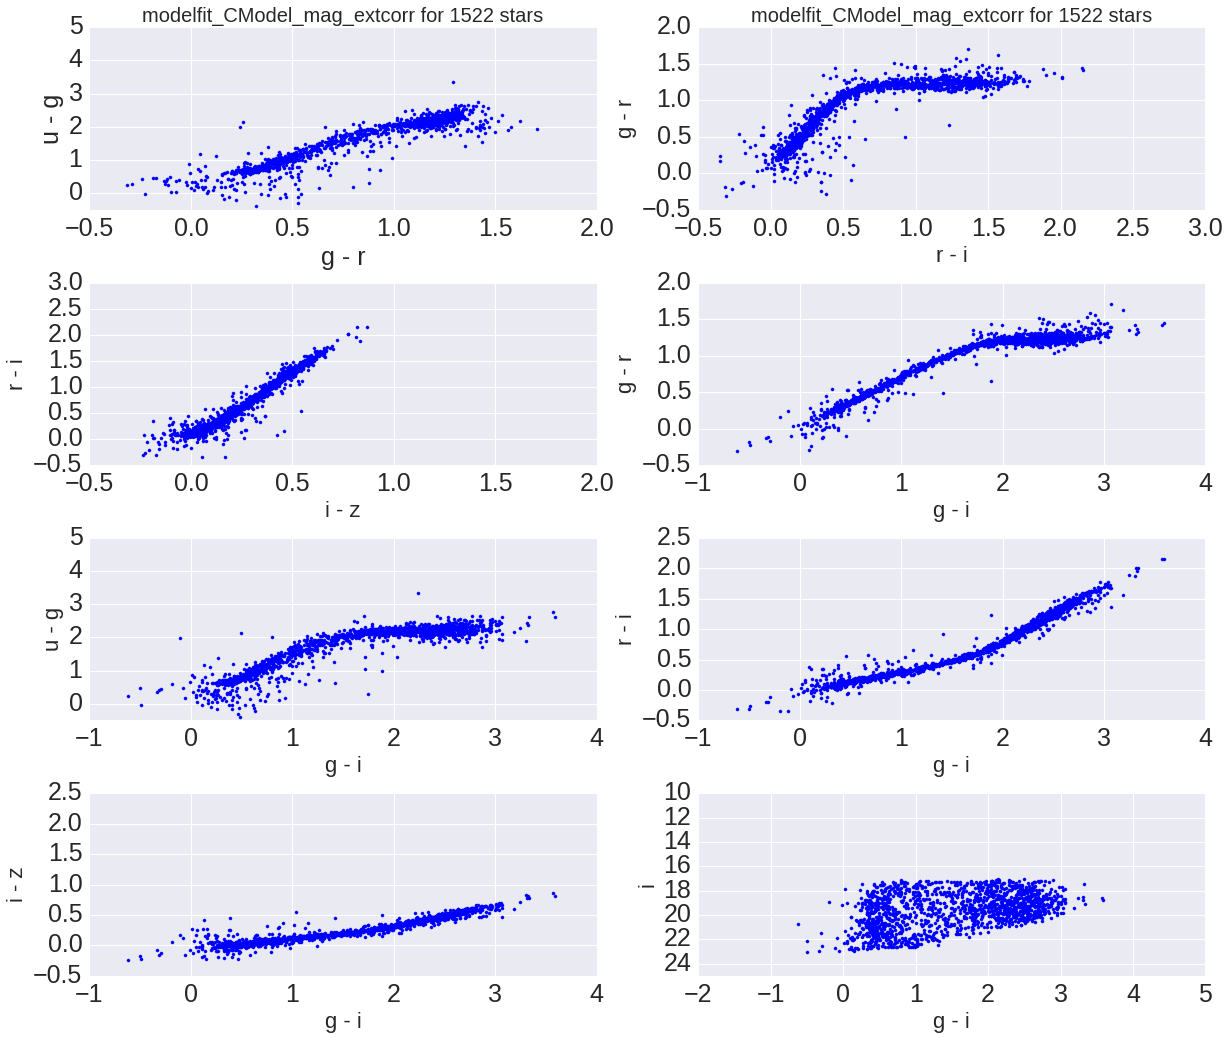

Will use old i (MP9701) filter


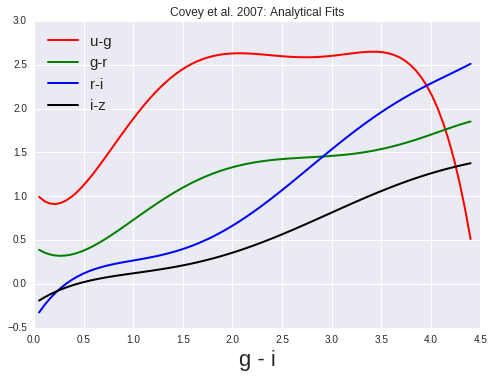

Saved plot:  derivedSDSSstellarLocusPlot_modelfit_CModel_mag_extcorr_i_old_deepCoadd_forced_src.png


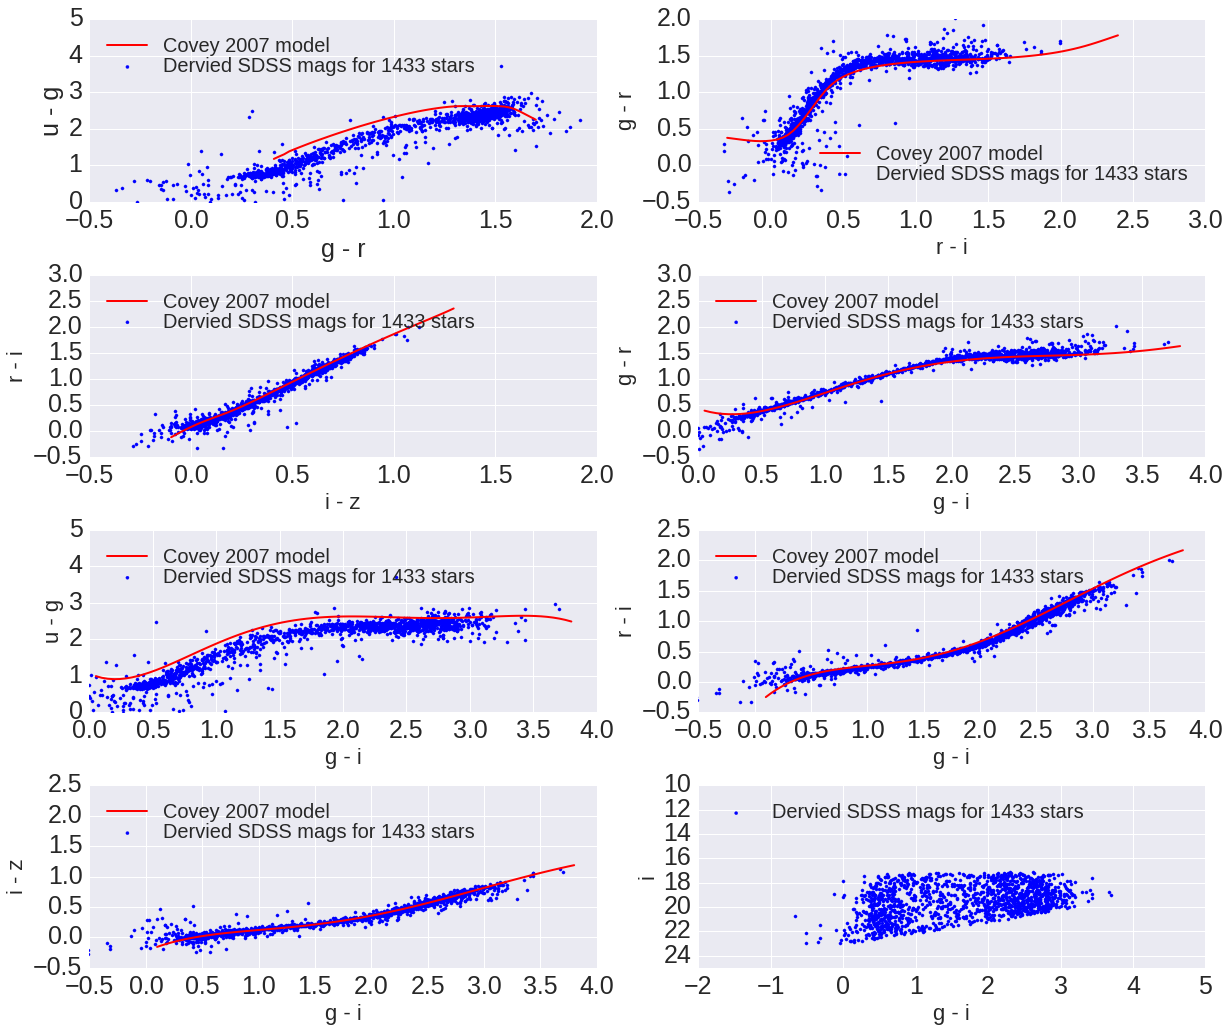

Saved plot:  residualsDerivedSDSSvsAnalyticalFit_modelfit_CModel_mag_extcorr_i_old_deepCoadd_forced_src.png


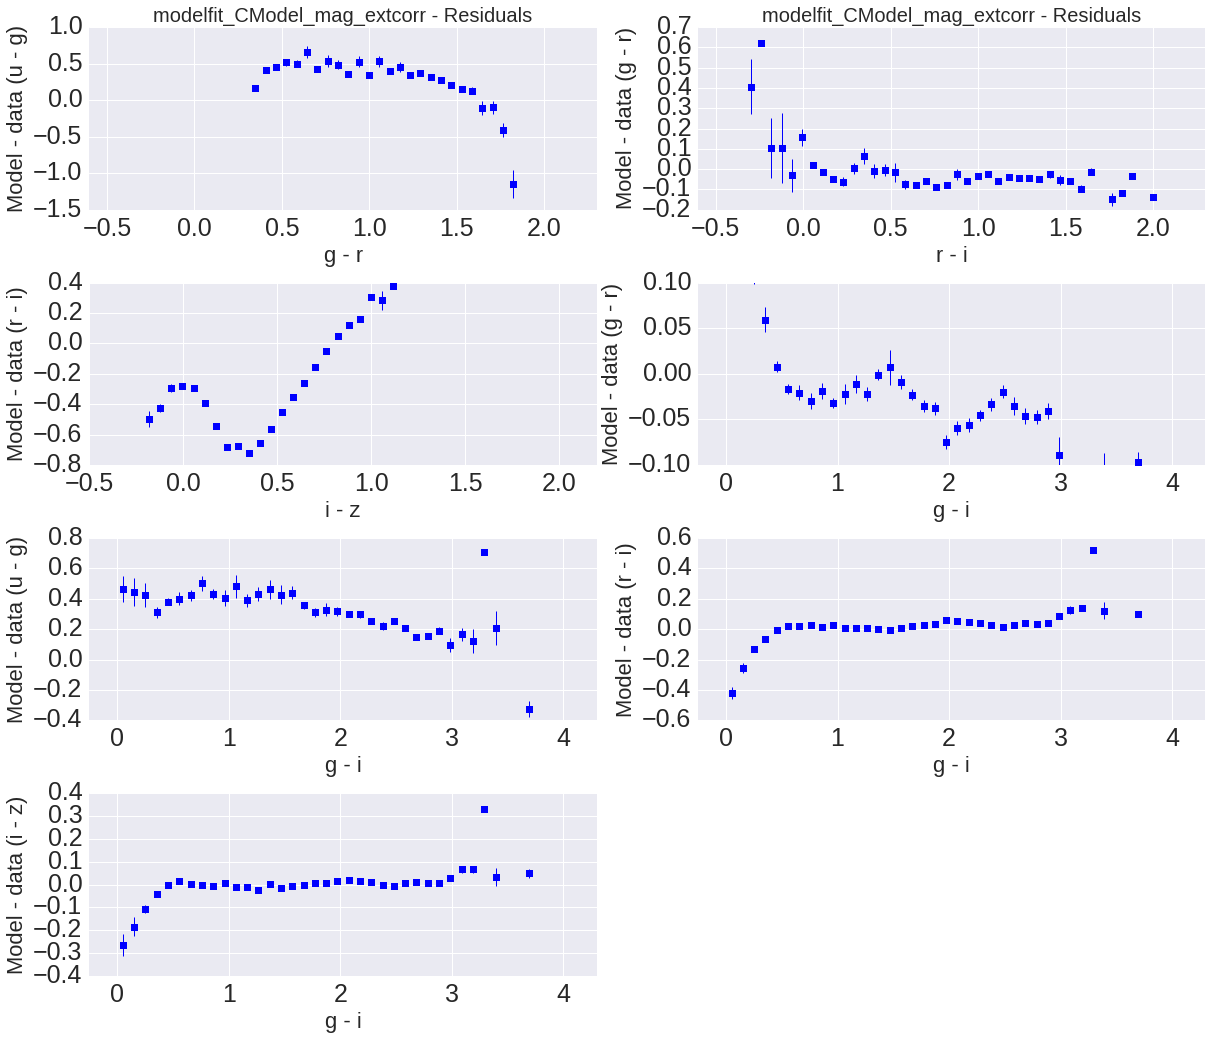

In [6]:
# plot stellar loci. 
validation.stellarLocus(d, mag_type="modelfit_CModel_mag_extcorr", ifilt="i_old", cat='deepCoadd_forced_src')